In [2]:
import pandas as pd
from os.path import join, splitext

specifications_path = join(output_folder, 'specifications.xlsx')
json_output_path = join(output_folder, 'assets.json')

raise Exception(input_folder)

excel_writer = pd.ExcelWriter(specifications_path)
for file_name in [
    'specs_data.csv',
    'scenario_info.csv',
    'scenario_parameters.csv',
]:
    table = pd.read_csv(join(input_folder, file_name))
    base_name = splitext(file_name)[0]
    sheet_name = ''.join(_.title() for _ in base_name.split('_'))
    table.to_excel(excel_writer, sheet_name=sheet_name, index=False)
excel_writer.save()

In [3]:
from os import makedirs
from os.path import join

details_folder = join(output_folder, 'details')
summaries_folder = join(output_folder, 'summaries')
try:
    makedirs(details_folder)
    makedirs(summaries_folder)
except OSError:
    pass

In [4]:
from onsset.runner import calibration, scenario

cities_path = join(input_folder, 'cities.csv')
calibrated_specifications_path = join(output_folder, 'specifications.xlsx')
calibrated_cities_path = join(output_folder, 'cities.csv') 

calibration(
    specs_path=specifications_path,
    csv_path=cities_path,
    specs_path_calib=calibrated_specifications_path,
    calibrated_csv_path=calibrated_cities_path)
scenario(
    specs_path=calibrated_specifications_path,
    calibrated_csv_path=calibrated_cities_path,
    results_folder=details_folder,
    summary_folder=summaries_folder)

2021-07-28 02:15:27,671		Populate ResidentialDemandTier columns
2021-07-28 02:15:27,675		Ensure that columns that are supposed to be numeric are numeric
2021-07-28 02:15:27,685		Replace null values with zero
2021-07-28 02:15:27,687		Sort by country, Y and X
2021-07-28 02:15:27,690		Classify road dist
2021-07-28 02:15:27,695		Classify substation dist
2021-07-28 02:15:27,698		Classify elevation
2021-07-28 02:15:27,700		Classify slope
2021-07-28 02:15:27,703		Classify land cover
2021-07-28 02:15:27,706		Combined classification
2021-07-28 02:15:27,708		Grid penalty
2021-07-28 02:15:27,711		Calculate Wind CF
2021-07-28 02:15:27,735		Population calibration process
2021-07-28 02:15:27,749		Urban/rural calibration process
2021-07-28 02:15:27,810		Population projection process
2021-07-28 02:15:27,878		Calibrate current electrification
2021-07-28 02:15:27,924		Calibration finished. Results are transferred to the csv file


The calibrated population differs by 0.00. In case this is not acceptable please revise this part of the code
We have identified the existence of transformers or MV lines as input data; therefore we proceed using those for the calibration
The modelled electrification rate differ by 0.00. Urban elec. rate differ by 0.00 and Rural elec. rate differ by 0.00. 
If this is not acceptable please revise this part of the algorithm


2021-07-28 02:15:28,054		Determine current MV line length
2021-07-28 02:15:28,057		Calculate new connections
2021-07-28 02:15:28,061		Setting electrification demand as per target per year
2021-07-28 02:15:28,081		Calculate minigrid hydro LCOE
2021-07-28 02:15:28,109		Calculate minigrid PV LCOE
2021-07-28 02:15:28,138		Calculate minigrid wind LCOE
2021-07-28 02:15:28,165		Calculate standalone PV LCOE
2021-07-28 02:15:28,180		Determine minimum technology (off-grid)
2021-07-28 02:15:28,194		Determine minimum tech LCOE


Djibouti
Scenario: 1


2021-07-28 02:15:28,201		Define the initial electrification status
2021-07-28 02:15:28,257		Initially 245 electrified
2021-07-28 02:15:28,327		Electrification loop 1 with 245 electrified
2021-07-28 02:15:28,390		Calculate investment cost
2021-07-28 02:15:28,396		Determine electrification limits
2021-07-28 02:15:28,401		Determine final electrification decision
2021-07-28 02:15:28,403		Calculate new capacity
2021-07-28 02:15:28,411		Calculate summaries
2021-07-28 02:15:28,439		Calculate new connections
2021-07-28 02:15:28,444		Setting electrification demand as per target per year
2021-07-28 02:15:28,457		Calculate minigrid hydro LCOE
2021-07-28 02:15:28,488		Calculate minigrid PV LCOE
2021-07-28 02:15:28,523		Calculate minigrid wind LCOE
2021-07-28 02:15:28,559		Calculate standalone PV LCOE
2021-07-28 02:15:28,579		Determine minimum technology (off-grid)
2021-07-28 02:15:28,597		Determine minimum tech LCOE


The electrification rate achieved in 2025 is 83.3 %


2021-07-28 02:15:28,604		Define the initial electrification status
2021-07-28 02:15:28,679		Initially 245 electrified
2021-07-28 02:15:28,748		Electrification loop 1 with 453 electrified
2021-07-28 02:15:28,785		Electrification loop 2 with 49 electrified
2021-07-28 02:15:28,826		Electrification loop 3 with 8 electrified
2021-07-28 02:15:28,866		Electrification loop 4 with 1 electrified
2021-07-28 02:15:28,884		Calculate investment cost
2021-07-28 02:15:28,889		Determine electrification limits
2021-07-28 02:15:28,891		Determine final electrification decision
2021-07-28 02:15:28,894		Calculate new capacity
2021-07-28 02:15:28,902		Calculate summaries
2021-07-28 02:15:29,058		Finished


The electrification rate achieved in 2030 is 100.0 %


In [5]:
from glob import glob
from os.path import basename, splitext

def collect_scenarios(target_path, source_folder):
    tables = []
    for path in glob(join(source_folder, '*.csv')):
        table = pd.read_csv(path)
        table['ScenarioName'] = basename(splitext(path)[0])
        columns = list(table.columns)
        columns.insert(0, columns.pop(columns.index('ScenarioName')))
        tables.append(table[columns])
    scenarios = pd.concat(tables)
    scenarios.to_csv(target_path, index=False)
    return scenarios
    
scenarios = collect_scenarios(join(output_folder, 'details.csv'), details_folder)
summaries = collect_scenarios(join(output_folder, 'summaries.csv'), summaries_folder)
scenarios.head

<bound method NDFrame.head of           ScenarioName     X_deg     Y_deg         Pop  GridCellArea  \
0     dj-1-1_1_1_1_0_0  42.00045  10.96680    91.06037         0.017   
1     dj-1-1_1_1_1_0_0  41.97670  10.97138    45.53018         0.009   
2     dj-1-1_1_1_1_0_0  42.01310  10.97166   182.12074         0.026   
3     dj-1-1_1_1_1_0_0  41.96837  10.98305    45.53018         0.009   
4     dj-1-1_1_1_1_0_0  42.05663  10.98480   774.01310         0.087   
...                ...       ...       ...         ...           ...   
1468  dj-1-1_1_1_1_0_0  43.19546  12.59022  1652.66190         0.103   
1469  dj-1-1_1_1_1_0_0  43.15357  12.62945    68.86091         0.009   
1470  dj-1-1_1_1_1_0_0  42.99938  12.63945    68.86091         0.009   
1471  dj-1-1_1_1_1_0_0  43.15107  12.64945    68.86091         0.009   
1472  dj-1-1_1_1_1_0_0  43.14482  12.65528   137.72182         0.017   

       Country    ElecPop   WindVel        GHI  TravelHours  ...  \
0     Djibouti     0.0000   5.08063  

In [6]:
report_year = summaries.columns[-1]
report_year

'2030'

In [7]:
t = summaries[['Unnamed: 0', report_year]]
t = t.set_index('Unnamed: 0')
t = t.squeeze()
t = t[t != 0]
t

Unnamed: 0
1.Population_Grid            1.111083e+06
1.Population_SA_PV           3.546339e+04
1.Population_MG_PV           3.195504e+04
1.Population_MG_Wind         6.488908e+02
2.New_Connections_Grid       2.058052e+05
2.New_Connections_SA_PV      3.546339e+04
2.New_Connections_MG_PV      3.195504e+04
2.New_Connections_MG_Wind    6.488908e+02
3.Capacity_Grid              9.644907e+03
3.Capacity_SA_PV             2.017458e+03
3.Capacity_MG_PV             2.037226e+03
3.Capacity_MG_Wind           2.835530e+01
4.Investment_Grid            3.367748e+07
4.Investment_SA_PV           5.261939e+06
4.Investment_MG_PV           4.632137e+06
4.Investment_MG_Wind         9.178262e+04
Name: 2030, dtype: float64

In [8]:
population_keys = [_ for _ in t.keys() if _.startswith('1.Population')]
population_keys

['1.Population_Grid',
 '1.Population_SA_PV',
 '1.Population_MG_PV',
 '1.Population_MG_Wind']

In [9]:
technology_codes = [_.replace('1.Population_', '') for _ in population_keys]
technology_codes

['Grid', 'SA_PV', 'MG_PV', 'MG_Wind']

In [10]:
technology_name_by_code = {
    'Grid': 'Grid Extension',
    'SA_PV': 'Stand Alone - Photovoltaic',
    'MG_PV': 'Mini Grid - Photovoltaic',
    'MG_Wind': 'Mini Grid - Wind',
}
technology_names = [technology_name_by_code[_] for _ in technology_codes]
technology_names

['Grid Extension',
 'Stand Alone - Photovoltaic',
 'Mini Grid - Photovoltaic',
 'Mini Grid - Wind']

In [11]:
import pandas as pd
summary_table = pd.DataFrame()
summary_table['Technology'] = technology_names

In [12]:
t

Unnamed: 0
1.Population_Grid            1.111083e+06
1.Population_SA_PV           3.546339e+04
1.Population_MG_PV           3.195504e+04
1.Population_MG_Wind         6.488908e+02
2.New_Connections_Grid       2.058052e+05
2.New_Connections_SA_PV      3.546339e+04
2.New_Connections_MG_PV      3.195504e+04
2.New_Connections_MG_Wind    6.488908e+02
3.Capacity_Grid              9.644907e+03
3.Capacity_SA_PV             2.017458e+03
3.Capacity_MG_PV             2.037226e+03
3.Capacity_MG_Wind           2.835530e+01
4.Investment_Grid            3.367748e+07
4.Investment_SA_PV           5.261939e+06
4.Investment_MG_PV           4.632137e+06
4.Investment_MG_Wind         9.178262e+04
Name: 2030, dtype: float64

In [13]:
population_index = '1.Population'
summary_table['Population Connected'] = t[t.index.str.contains(population_index)].reset_index(drop=True)
summary_table

,Technology,Population Connected
0,Grid Extension,1.111083e+06
1,Stand Alone - Photovoltaic,3.546339e+04
2,Mini Grid - Photovoltaic,3.195504e+04
3,Mini Grid - Wind,6.488908e+02


In [14]:
investment_index = '4.Investment'
summary_table['Investment Required'] = t[t.index.str.contains(investment_index)].reset_index(drop=True)
summary_table


,Technology,Population Connected,Investment Required
0,Grid Extension,1.111083e+06,3.367748e+07
1,Stand Alone - Photovoltaic,3.546339e+04,5.261939e+06
2,Mini Grid - Photovoltaic,3.195504e+04,4.632137e+06
3,Mini Grid - Wind,6.488908e+02,9.178262e+04


In [15]:
added_capacity_index = '3.Capacity'
summary_table['Added Capacity'] = t[t.index.str.contains(added_capacity_index)].reset_index(drop=True)

with open(join(output_folder, "overview-table.geojson"), 'w') as f:
    summary_table.to_csv(f)
summary_table


,Technology,Population Connected,Investment Required,Added Capacity
0,Grid Extension,1.111083e+06,3.367748e+07,9644.907356
1,Stand Alone - Photovoltaic,3.546339e+04,5.261939e+06,2017.458285
2,Mini Grid - Photovoltaic,3.195504e+04,4.632137e+06,2037.225544
3,Mini Grid - Wind,6.488908e+02,9.178262e+04,28.355296


2021-07-28 02:15:29,415		Found GEOS DLL: <CDLL '/home/ma/code/crosscompute/.env/lib/python3.8/site-packages/shapely/.libs/libgeos_c-a68605fd.so.1.13.1', handle 3ff38b0 at 0x7fc5947f4e80>, using it.
2021-07-28 02:15:29,422		Trying `CDLL(libc.so.6)`
2021-07-28 02:15:29,423		Library path: 'libc.so.6'
2021-07-28 02:15:29,424		DLL: <CDLL 'libc.so.6', handle 7fc5ec596000 at 0x7fc5947f4ee0>
2021-07-28 02:15:29,463		GDAL data found in package: path='/home/ma/code/crosscompute/.env/lib/python3.8/site-packages/fiona/gdal_data'.
2021-07-28 02:15:29,463		PROJ data found in package: path='/home/ma/code/crosscompute/.env/lib/python3.8/site-packages/fiona/proj_data'.
2021-07-28 02:15:29,466		Entering env context: <fiona.env.Env object at 0x7fc5cc742d00>
2021-07-28 02:15:29,466		Starting outermost env
2021-07-28 02:15:29,467		No GDAL environment exists
2021-07-28 02:15:29,467		New GDAL environment <fiona._env.GDALEnv object at 0x7fc5cc742460> created
2021-07-28 02:15:29,470		GDAL data found in package

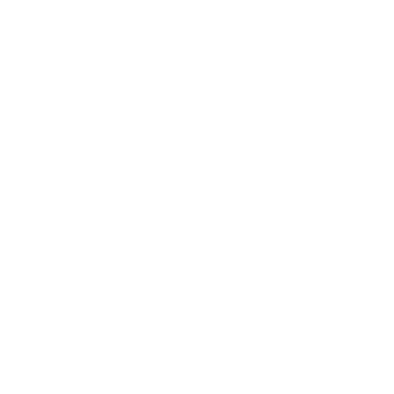

In [16]:
import geopandas
import matplotlib.pyplot as plt
import json

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

fig, ax = plt.subplots(1, 1, figsize=(9, 7))
ax.set_aspect('equal')
ax.set_yticklabels([])
ax.set_xticklabels([])

ax.axis("off")

cell_positions = scenarios[['X_deg', 'Y_deg', 'Pop', 'GridCellArea', 'Country']]

gdf = geopandas.GeoDataFrame(
    cell_positions, geometry=geopandas.points_from_xy(scenarios.X_deg, scenarios.Y_deg))

collection = {
  "type": "FeatureCollection",
  "features": [
    {
      "type": "Feature",
      "geometry": {
        "type": "Point",
        "coordinates": [row['X_deg'], row['Y_deg']]
      },
      "properties": {
        "Population": row['Pop'],
        'GridCellArea': row['GridCellArea']
      }
    } for index, row in gdf.iterrows()
  ]
}

#ax = world[world.name == 'Djibouti'].plot(
#    color='#F0F0F0', edgecolor='#333333', ax=ax)

# We can now plot our ``GeoDataFrame``.
#gdf.plot(markersize='GridCellArea', cmap='OrRd', ax=ax)

with open(join(output_folder, "overview-map.csv"), 'w') as f:
    json.dump(collection ,f)
#gdf.to_file(, driver='GeoJSON')

#plt.tight_layout()
#plt.show()

#plt.savefig(join(output_folder, 'figure1.png'))

# collection